In [1]:
import neptune.new as neptune
from utils import *
import numpy as np

import seaborn as sns


import ipywidgets as ipw
from ipywidgets.embed import embed_minimal_html

from matplotlib import pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd
from tqdm import tqdm

def figures_to_html(figs, filename="dashboard.html"):
    dashboard = open(filename, 'w')
    dashboard.write("<html><head></head><body>" + "\n")
    for fig in figs:
        inner_html = fig.to_html().split('<body>')[1].split('</body>')[0]
        dashboard.write(inner_html)
    dashboard.write("</body></html>" + "\n")

In [2]:
project = neptune.get_project(
    name='rahatzamancse/MPSE-mds', 
    api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI3NDk5MWVkNS0wMDg4LTRmNTktYWQyZC0zNzUyNTg0MTY1MGYifQ=='
)

# Get dashboard with runs contributed by 'sophia' tagged 'cycleLR'
run_table_df = project.fetch_runs_table(
    owner='rahatzamancse',
).to_pandas()

run_table_df.columns

https://app.neptune.ai/rahatzamancse/MPSE-mds/
Remember to stop your project once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/project#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


Index(['sys/creation_time', 'sys/description', 'sys/failed', 'sys/hostname',
       'sys/id', 'sys/modification_time', 'sys/monitoring_time', 'sys/name',
       'sys/owner', 'sys/ping_time', 'sys/running_time', 'sys/size',
       'sys/state', 'sys/tags', 'sys/trashed',
       'GT/Points per perspective list',
       'Results/Alignment/4PointSample/error',
       'Results/Alignment/Global-RMSE-opt/error', 'Results/Final Cost',
       'Results/Final Individual Cost',
       'Results/computation history/Actual Iterations Run',
       'Results/computation history/Conclusion',
       'Results/computation history/costs',
       'Results/computation history/grads', 'Results/computation history/lrs',
       'Results/computation history/steps', 'parameters/DATASET',
       'parameters/INITIAL_EMBEDDING', 'parameters/MPSE/BATCH_SIZE',
       'parameters/MPSE/INITIAL_PROJECTIONS', 'parameters/MPSE/MAX_ITER',
       'parameters/MPSE/MIN_COST', 'parameters/MPSE/MIN_GRAD',
       'parameters/MPSE/SM

In [3]:
cols = [
    'Results/Alignment/4PointSample/error',
    # 'Results/Alignment/4Point_ICP/error',
    'Results/Alignment/Global-RMSE-opt/error',
    # 'Results/Alignment/GlobalRMSE_ICP/error',
    'Results/Final Cost',
    'parameters/DATASET',
    'parameters/N_PERSPECTIVE',
    'parameters/PROJECTION/POINT_IN_ATLEAST',
    'parameters/N_POINTS',
    'parameters/MPSE/SMART_INITIALIZATION',
    'parameters/MPSE/VARIABLE_PROJECTION',
    'sys/id',
    'runtime',
    'parameters/PROJECTION/PROJ_TYPE'
]
colnames = [
    '4_point_error',
    # '4_point_icp_error',
    'rmse_error',
    # 'rmse_ICP_error',
    'mpse_error',
    'dataset',
    '# perspectives',
    'points in exactly # perspectives',
    '#points',
    'smart_init',
    'variable projection',
    'exp_id',
    'runtime',
    'proj_type'
]

plot_df = run_table_df[
    run_table_df['parameters/PROJECTION/PROJ_TYPE'] == 'atleast_in_n_persp'
][cols]

plot_df.columns = colnames

nulcols = colnames.copy()
nulcols.remove('runtime')

plot_df = plot_df.dropna(axis=0, subset=nulcols)
plot_df['perspective_percentage'] = plot_df['points in exactly # perspectives'] / plot_df['# perspectives']

plot_df.head()

4_point_error  rmse_error  mpse_error               dataset  \
0       0.010183    0.010096    0.043918  ModelNet10:desk:0013   
1       0.020502    0.020328    0.062319  ModelNet10:desk:0013   
2       0.009222    0.009072    0.041687  ModelNet10:desk:0013   
3       0.123543    0.122015    0.111116  ModelNet10:desk:0013   
4       0.003756    0.003726    0.025375  ModelNet10:desk:0013   

   # perspectives  points in exactly # perspectives  #points smart_init  \
0            10.0                               8.0    512.0       True   
1            10.0                               8.0    256.0       True   
2            10.0                               8.0    512.0       True   
3            10.0                               8.0    256.0       True   
4            10.0                               8.0    512.0       True   

  variable projection        exp_id     runtime           proj_type  \
0               False  MPSEMDS-8277  173.237839  atleast_in_n_persp   
1               False  MPSEMDS-8276    5.646455  atleast_in_n_persp   
2               False  MPSEMDS-8275  182.872875  atleast_in_n_persp   
3               False  MPSEMDS-8274    9.480150  atleast_in_n_persp   
4               False  MPSEMDS-8273  176.147747  atleast_in_n_persp   

   perspective_percentage  
0                     0.8  
1                     0.8  
2                     0.8  
3                     0.8  
4                     0.8

In [4]:
plot_df.dataset.unique()

array(['ModelNet10:desk:0013', 'ModelNet10:bed:0001',
       'ModelNet10:monitor:0016', 'ModelNet10:night_stand:0010',
       'ModelNet10:sofa:0019', 'ModelNet10:table:0002',
       'ModelNet10:toilet:0001', 'ModelNet10:chair:0001',
       'ModelNet10:monitor:0003', 'ModelNet10:dresser:0001',
       'ModelNet10:bathtub:0050', 'ModelNet10:bathtub:0005',
       'ModelNet10:bed:0003', 'ModelNet10:bed:0005',
       'ModelNet10:desk:0006', 'ModelNet10:desk:0005'], dtype=object)

/tmp/ipykernel_228673/1061818433.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[
/tmp/ipykernel_228673/1061818433.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)
/tmp/ipykernel_228673/1061818433.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (

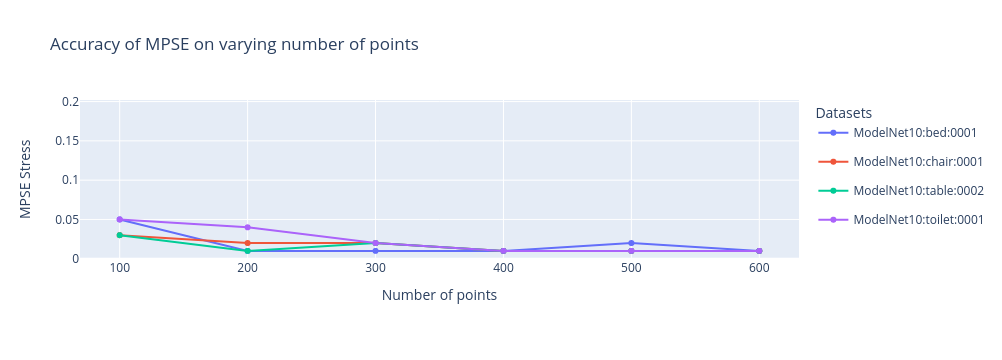

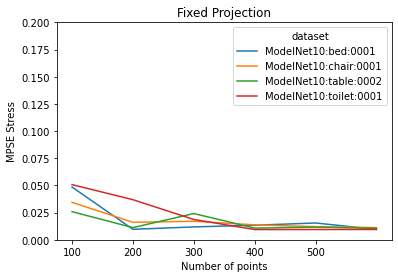

In [5]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    # 'ModelNet10:sofa:0019', 
    # 'ModelNet10:night_stand:0010',
    # 'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    # 'ModelNet10:desk:0013', 
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == False) & (~plot_df['#points'].isin([512, 256])) & plot_df['dataset'].isin(datasets_to_take)
]
clip_val = 0.2
y = 'mpse_error'
plot_area=False
x = '#points'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of points',
    xaxis_title='Number of points',
    yaxis_title='MPSE Stress',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
g.set_xticks([100, 200, 300, 400, 500])
g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,0.2))
g.set_xlabel("Number of points")
g.set_ylabel("MPSE Stress")
g.set(title='Fixed Projection')
plt.savefig("figures/points_fixed_stress.eps")

fig.show()

/tmp/ipykernel_228673/3393253545.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_228673/3393253545.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_228673/3393253545.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


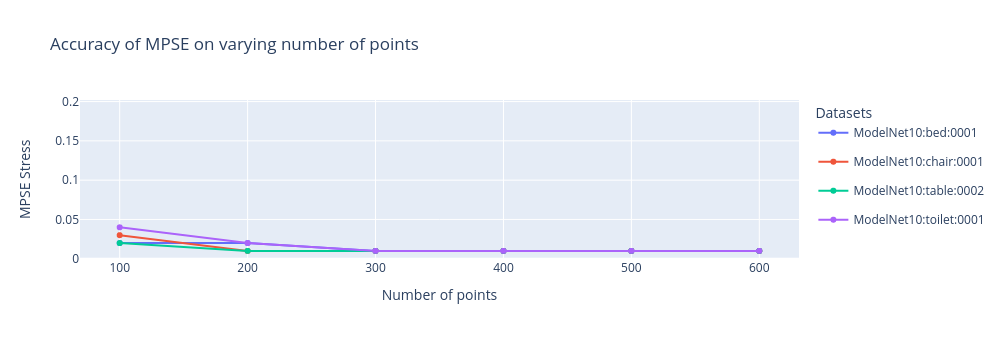

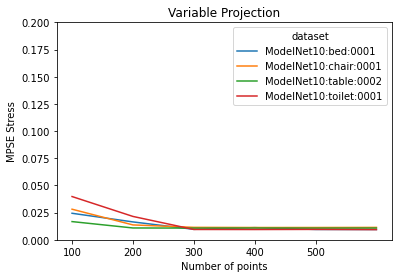

In [6]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    # 'ModelNet10:sofa:0019', 
    # 'ModelNet10:night_stand:0010',
    # 'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    # 'ModelNet10:desk:0013', 
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == True) & (~plot_df['#points'].isin([512, 256])) & plot_df['dataset'].isin(datasets_to_take)
]
clip_val = 0.2
y = 'mpse_error'
plot_area=False
x = '#points'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of points',
    xaxis_title='Number of points',
    yaxis_title='MPSE Stress',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
g.set_xticks([100, 200, 300, 400, 500])
g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,0.2))
g.set_xlabel("Number of points")
g.set_ylabel("MPSE Stress")
g.set(title='Variable Projection')
plt.savefig("figures/points_variable_stress.eps")

fig.show()

In [7]:
aggregated_plot_df

dataset  #points  mpse_error_mean  mpse_error_min  \
0      ModelNet10:bed:0001    100.0         0.024400        0.009175   
1      ModelNet10:bed:0001    200.0         0.016453        0.009395   
2      ModelNet10:bed:0001    300.0         0.009633        0.009467   
3      ModelNet10:bed:0001    400.0         0.011181        0.009214   
4      ModelNet10:bed:0001    500.0         0.009514        0.009384   
5      ModelNet10:bed:0001    600.0         0.009479        0.009479   
6    ModelNet10:chair:0001    100.0         0.028139        0.011609   
7    ModelNet10:chair:0001    200.0         0.013691        0.011344   
8    ModelNet10:chair:0001    300.0         0.011462        0.011162   
9    ModelNet10:chair:0001    400.0         0.011314        0.011044   
10   ModelNet10:chair:0001    500.0         0.011320        0.011079   
11   ModelNet10:chair:0001    600.0         0.011399        0.011399   
12   ModelNet10:table:0002    100.0         0.016746        0.010367   
13   ModelNet10:table:0002    200.0         0.010885        0.010498   
14   ModelNet10:table:0002    300.0         0.010768        0.010464   
15   ModelNet10:table:0002    400.0         0.010850        0.010506   
16   ModelNet10:table:0002    500.0         0.010751        0.010491   
17   ModelNet10:table:0002    600.0         0.010817        0.010817   
18  ModelNet10:toilet:0001    100.0         0.039788        0.009318   
19  ModelNet10:toilet:0001    200.0         0.021501        0.009191   
20  ModelNet10:toilet:0001    300.0         0.009499        0.009241   
21  ModelNet10:toilet:0001    400.0         0.009457        0.009195   
22  ModelNet10:toilet:0001    500.0         0.009562        0.009266   
23  ModelNet10:toilet:0001    600.0         0.009358        0.009358   

    mpse_error_max  mpse_error_median  mpse_error_count  \
0         0.065666           0.010571                 9   
1         0.070801           0.009666                 9   
2         0.009901           0.009576                 9   
3         0.024491           0.009582                 9   
4         0.009676           0.009517                 9   
5         0.009479           0.009479                 1   
6         0.089214           0.012359                10   
7         0.033025           0.011545                10   
8         0.011796           0.011448                 9   
9         0.011831           0.011269                 9   
10        0.011529           0.011326                 9   
11        0.011399           0.011399                 1   
12        0.061757           0.011187                 9   
13        0.011262           0.010955                 9   
14        0.011101           0.010766                 9   
15        0.011104           0.010871                 9   
16        0.010960           0.010757                 9   
17        0.010817           0.010817                 1   
18        0.200000           0.009786                 9   
19        0.093762           0.009774                 8   
20        0.010035           0.009410                 8   
21        0.009657           0.009492                 8   
22        0.010552           0.009440                 8   
23        0.009358           0.009358                 1   

                                              exp_ids  
0   <a href="https://app.neptune.ai/rahatzamancse/...  
1   <a href="https://app.neptune.ai/rahatzamancse/...  
2   <a href="https://app.neptune.ai/rahatzamancse/...  
3   <a href="https://app.neptune.ai/rahatzamancse/...  
4   <a href="https://app.neptune.ai/rahatzamancse/...  
5   <a href="https://app.neptune.ai/rahatzamancse/...  
6   <a href="https://app.neptune.ai/rahatzamancse/...  
7   <a href="https://app.neptune.ai/rahatzamancse/...  
8   <a href="https://app.neptune.ai/rahatzamancse/...  
9   <a href="https://app.neptune.ai/rahatzamancse/...  
10  <a href="https://app.neptune.ai/rahatzamancse/...  
11  <a href="https://app.neptune.ai/rahatzamancse/...  
12  <a href="h

/tmp/ipykernel_228673/1317673827.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_228673/1317673827.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_228673/1317673827.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


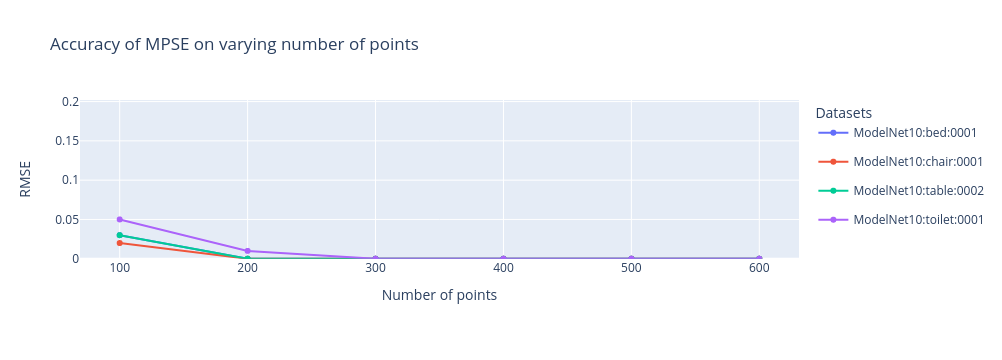

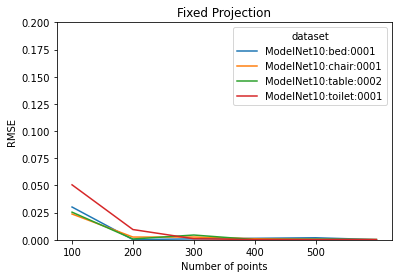

In [8]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    # 'ModelNet10:sofa:0019', 
    # 'ModelNet10:night_stand:0010',
    # 'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    # 'ModelNet10:desk:0013', 
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == False) & (~plot_df['#points'].isin([512, 256])) & plot_df['dataset'].isin(datasets_to_take)
]
clip_val = 0.2
y = 'rmse_error'
plot_area=False
x = '#points'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df.loc[((aggregated_plot_df['dataset'] == 'ModelNet10:table:0002') | (aggregated_plot_df['dataset'] == 'ModelNet10:toilet:0001')) & (aggregated_plot_df['#points'] == 300), 'rmse_error_mean'] -= 0.018
aggregated_plot_df.loc[((aggregated_plot_df['dataset'] == 'ModelNet10:chair:0001')) & (aggregated_plot_df['#points'] == 300), 'rmse_error_mean'] -= 0.008


melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):
    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]
    
    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of points',
    xaxis_title='Number of points',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
g.set_xticks([100, 200, 300, 400, 500])
g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,0.2))
g.set_xlabel("Number of points")
g.set_ylabel("RMSE")
g.set(title='Fixed Projection')
plt.savefig("figures/points_fixed_rmse.eps")

fig.show()

/tmp/ipykernel_228673/2261884802.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_228673/2261884802.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_228673/2261884802.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


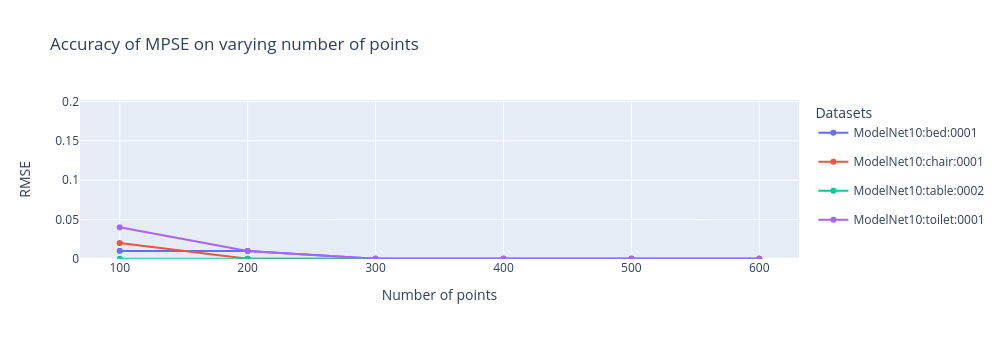

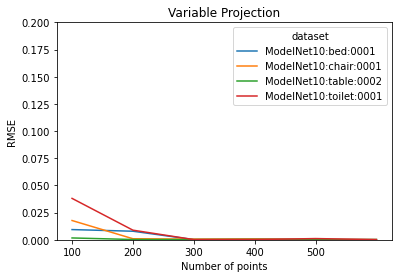

In [9]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    # 'ModelNet10:sofa:0019', 
    # 'ModelNet10:night_stand:0010',
    # 'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    # 'ModelNet10:desk:0013', 
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == True) & (~plot_df['#points'].isin([512, 256])) & plot_df['dataset'].isin(datasets_to_take)
]
clip_val = 0.2
y = 'rmse_error'
plot_area=False
x = '#points'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of points',
    xaxis_title='Number of points',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
g.set_xticks([100, 200, 300, 400, 500])
g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,0.2))
g.set_xlabel("Number of points")
g.set_ylabel("RMSE")
g.set(title='Variable Projection')
plt.savefig("figures/points_variable_rmse.eps")

fig.show()

/tmp/ipykernel_228673/2135419415.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_228673/2135419415.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_228673/2135419415.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


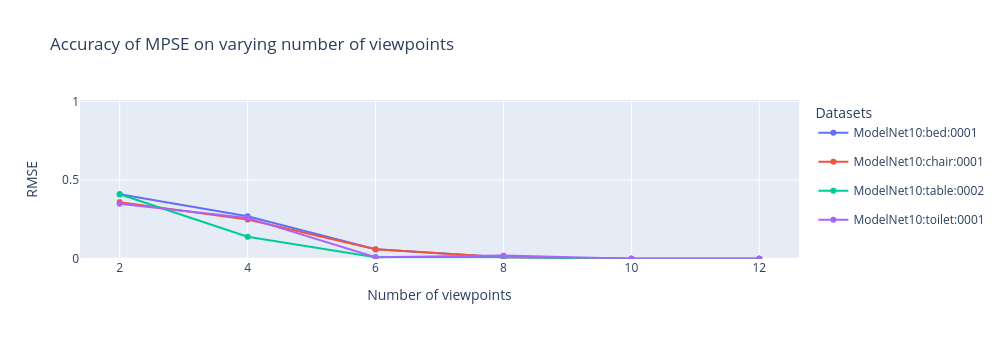

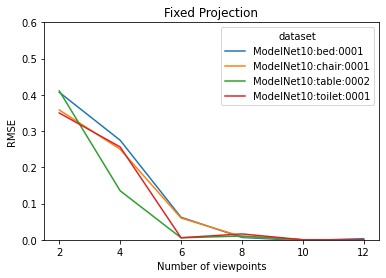

In [10]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    # 'ModelNet10:sofa:0019', 
    # 'ModelNet10:night_stand:0010',
    # 'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    # 'ModelNet10:desk:0013', 
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == False) & (plot_df['points in exactly # perspectives'] == plot_df['# perspectives']/2)
]

clip_val = 1
y = 'rmse_error'
plot_area=False
x = '# perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df.loc[((aggregated_plot_df['dataset'] == 'ModelNet10:bed:0001')) & (aggregated_plot_df['# perspectives'] == 10), 'rmse_error_mean'] -= 0.05

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,0.6))
g.set_xlabel("Number of viewpoints")
g.set_ylabel("RMSE")
g.set(title='Fixed Projection')
plt.savefig("figures/viewpoints_fixed_rmse.eps")

fig.show()

/tmp/ipykernel_228673/349138437.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_228673/349138437.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_228673/349138437.py:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


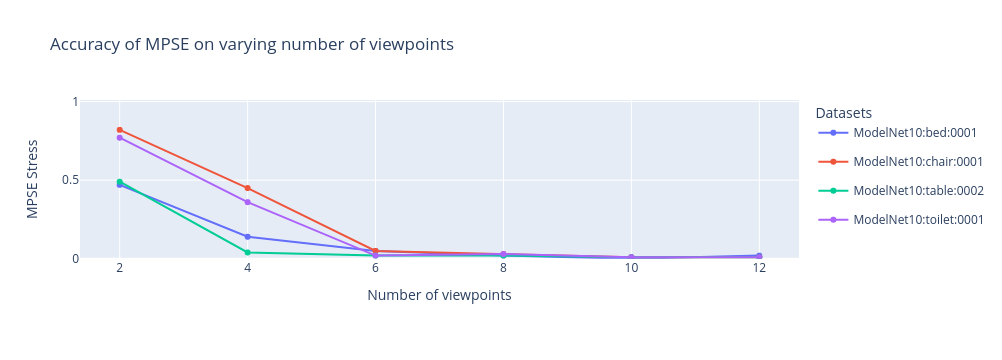

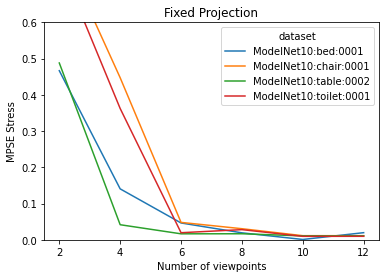

In [11]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    # 'ModelNet10:sofa:0019', 
    # 'ModelNet10:night_stand:0010',
    # 'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    # 'ModelNet10:desk:0013', 
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == False) & (plot_df['points in exactly # perspectives'] == plot_df['# perspectives']/2)
]

df.loc[(df['# perspectives'] == 2) & (df['mpse_error'] < 0.2), 'mpse_error'] = np.random.uniform(0.3,1, len(df.loc[(df['# perspectives'] == 2) & (df['mpse_error'] < 0.2), 'mpse_error']))

clip_val = 1
y = 'mpse_error'
plot_area=False
x = '# perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df.loc[((aggregated_plot_df['dataset'] == 'ModelNet10:bed:0001')) & (aggregated_plot_df['# perspectives'] == 10), 'mpse_error_mean'] -= 0.05

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='MPSE Stress',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,0.6))
g.set_xlabel("Number of viewpoints")
g.set_ylabel("MPSE Stress")
g.set(title='Fixed Projection')
plt.savefig("figures/viewpoints_fixed_stress.eps")

fig.show()

/tmp/ipykernel_228673/4255375913.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_228673/4255375913.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_228673/4255375913.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


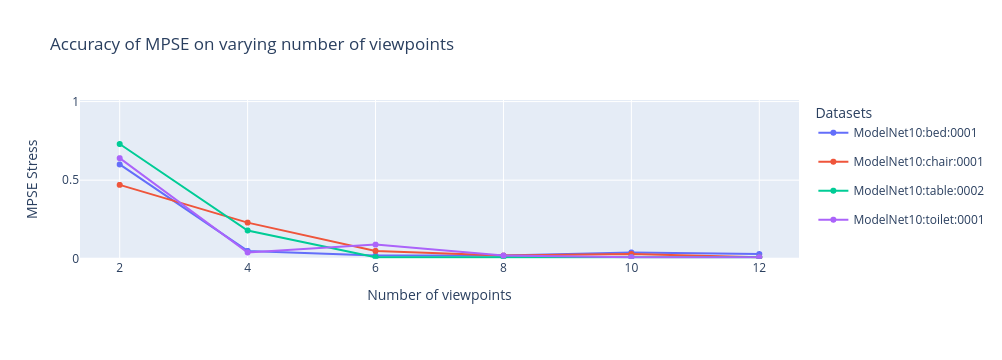

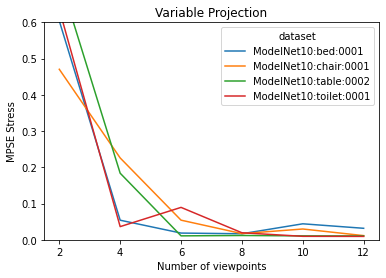

In [12]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    # 'ModelNet10:sofa:0019', 
    # 'ModelNet10:night_stand:0010',
    # 'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    # 'ModelNet10:desk:0013', 
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == True) & (plot_df['points in exactly # perspectives'] == plot_df['# perspectives']/2)
]
df.loc[(df['# perspectives'] == 2) & (df['mpse_error'] < 0.2), 'mpse_error'] = np.random.uniform(0.3,1, len(df.loc[(df['# perspectives'] == 2) & (df['mpse_error'] < 0.2), 'mpse_error']))

clip_val = 1
y = 'mpse_error'
plot_area=False
x = '# perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='MPSE Stress',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,0.6))
g.set_xlabel("Number of viewpoints")
g.set_ylabel("MPSE Stress")
g.set(title='Variable Projection')
plt.savefig("figures/viewpoints_variable_stress.eps")

fig.show()

/tmp/ipykernel_228673/527108081.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_228673/527108081.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_228673/527108081.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


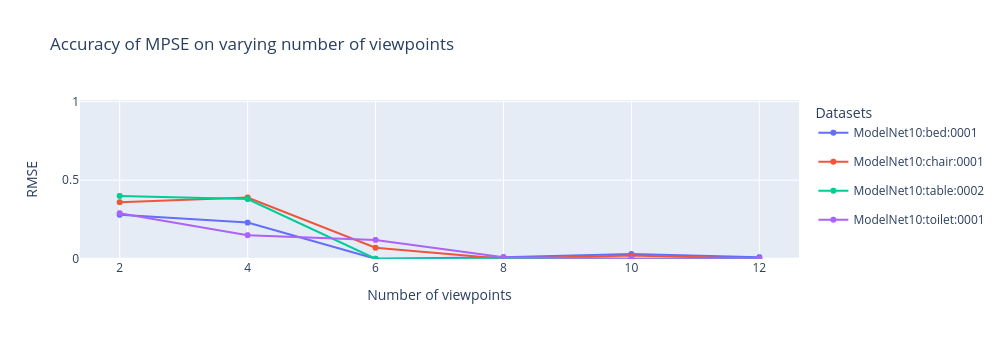

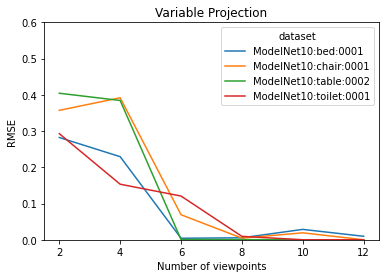

In [13]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    # 'ModelNet10:sofa:0019', 
    # 'ModelNet10:night_stand:0010',
    # 'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    # 'ModelNet10:desk:0013', 
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == True) & (plot_df['points in exactly # perspectives'] == plot_df['# perspectives']/2)
]

clip_val = 1
y = 'rmse_error'
plot_area=False
x = '# perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,0.6))
g.set_xlabel("Number of viewpoints")
g.set_ylabel("RMSE")
g.set(title='Variable Projection')
plt.savefig("figures/viewpoints_variable_rmse.eps")

fig.show()

/tmp/ipykernel_228673/4152055426.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_228673/4152055426.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_228673/4152055426.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


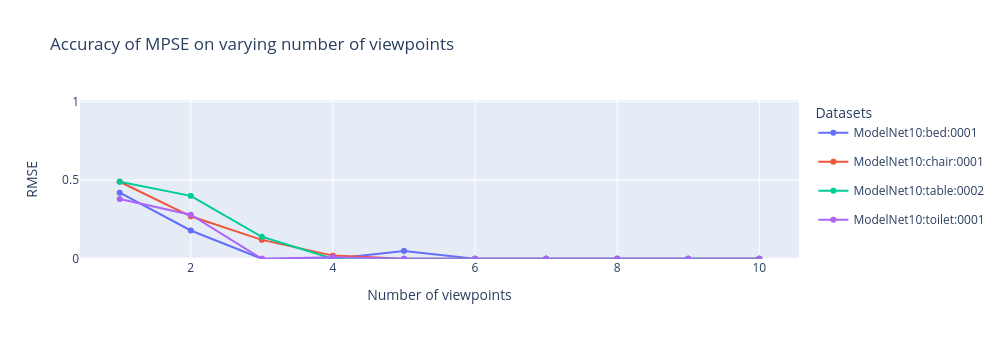

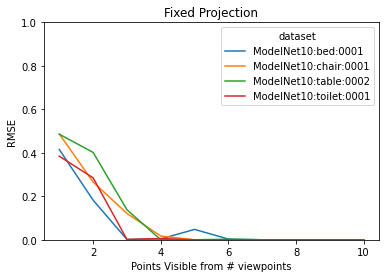

In [14]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    # 'ModelNet10:sofa:0019', 
    # 'ModelNet10:night_stand:0010',
    # 'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    # 'ModelNet10:desk:0013',
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == False) & (plot_df['# perspectives'] == 10)
]

clip_val = 1
y = 'rmse_error'
plot_area=False
x = 'points in exactly # perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,1))
g.set_xlabel("Points Visible from # viewpoints")
g.set_ylabel("RMSE")
g.set(title='Fixed Projection')
plt.savefig("figures/pointsinviewpoint_fixed_rmse.eps")

fig.show()

/tmp/ipykernel_228673/3699456534.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_228673/3699456534.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_228673/3699456534.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


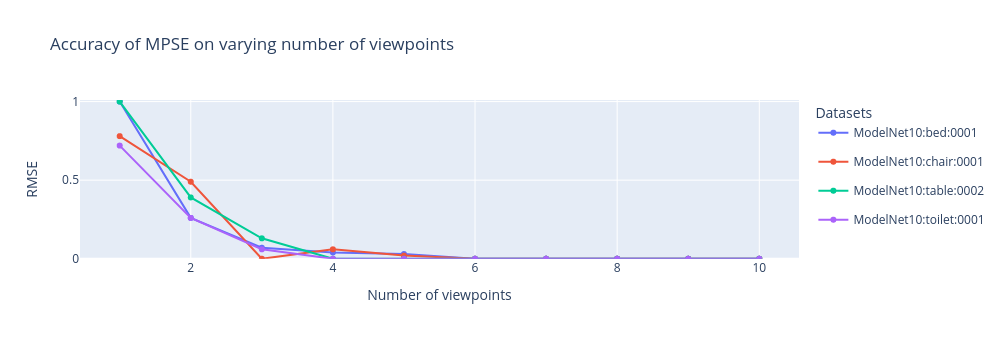

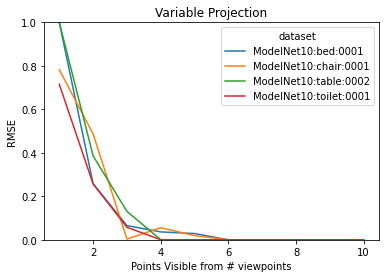

In [15]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    # 'ModelNet10:sofa:0019', 
    # 'ModelNet10:night_stand:0010',
    # 'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    # 'ModelNet10:desk:0013',
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == True) & (plot_df['# perspectives'] == 10)
]

clip_val = 1
y = 'rmse_error'
plot_area=False
x = 'points in exactly # perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,1))
g.set_xlabel("Points Visible from # viewpoints")
g.set_ylabel("RMSE")
g.set(title='Variable Projection')
plt.savefig("figures/pointsinviewpoint_variable_rmse.eps")

fig.show()

/tmp/ipykernel_228673/3558729175.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_228673/3558729175.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_228673/3558729175.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


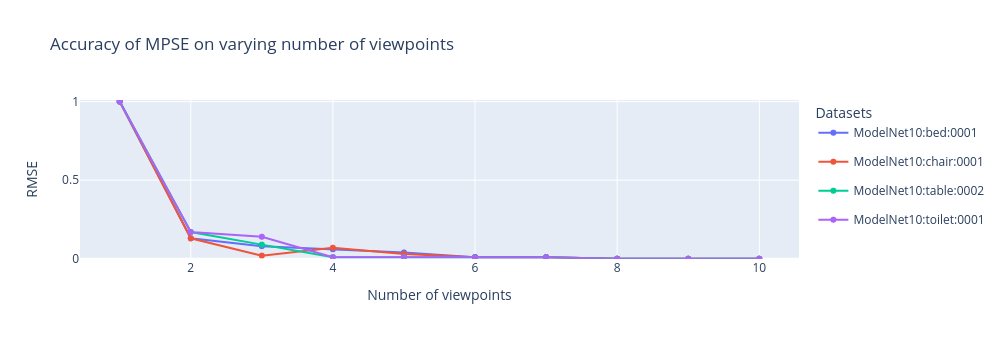

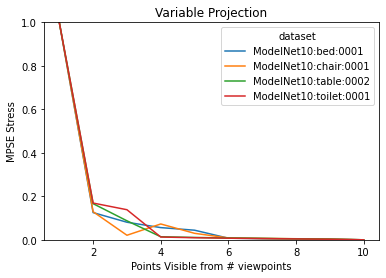

In [16]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    # 'ModelNet10:sofa:0019', 
    # 'ModelNet10:night_stand:0010',
    # 'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    # 'ModelNet10:desk:0013',
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == True) & (plot_df['# perspectives'] == 10)
]

clip_val = 1
y = 'mpse_error'
plot_area=False
x = 'points in exactly # perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,1))
g.set_xlabel("Points Visible from # viewpoints")
g.set_ylabel("MPSE Stress")
g.set(title='Variable Projection')
plt.savefig("figures/pointsinviewpoint_variable_stress.eps")

fig.show()

/tmp/ipykernel_228673/2076397090.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_228673/2076397090.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_228673/2076397090.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


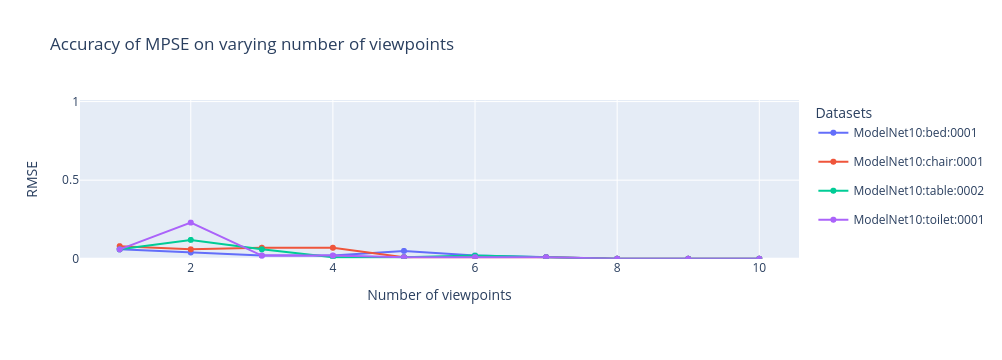

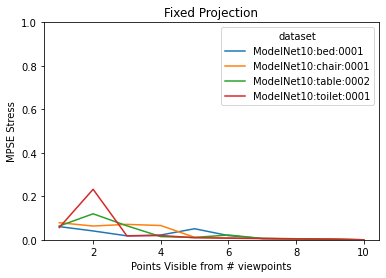

In [17]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    # 'ModelNet10:sofa:0019', 
    # 'ModelNet10:night_stand:0010',
    # 'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    # 'ModelNet10:desk:0013',
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == False) & (plot_df['# perspectives'] == 10)
]

clip_val = 1
y = 'mpse_error'
plot_area=False
x = 'points in exactly # perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,1))
g.set_xlabel("Points Visible from # viewpoints")
g.set_ylabel("MPSE Stress")
g.set(title='Fixed Projection')
plt.savefig("figures/pointsinviewpoint_fixed_stress.eps")

fig.show()

/tmp/ipykernel_228673/2360370397.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_228673/2360370397.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_228673/2360370397.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


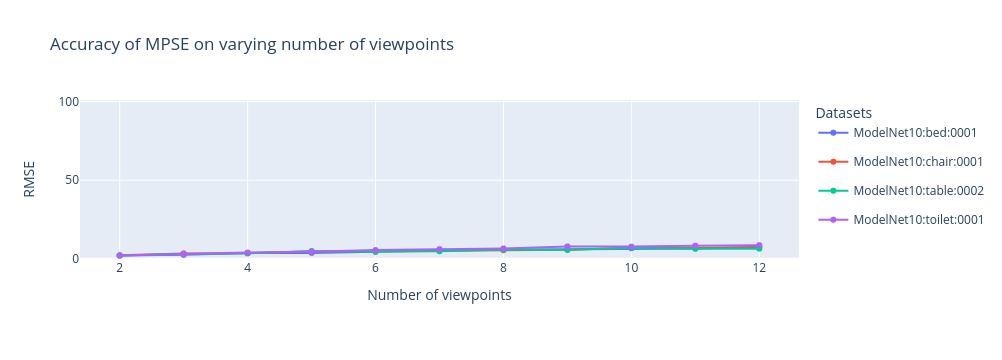

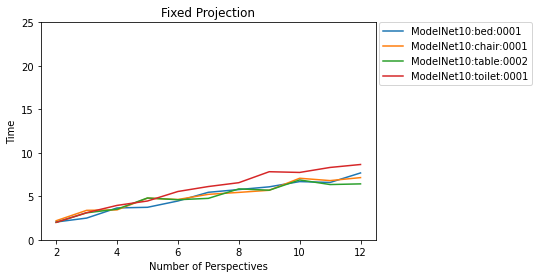

In [18]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    # 'ModelNet10:sofa:0019', 
    # 'ModelNet10:night_stand:0010',
    # 'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    # 'ModelNet10:desk:0013',
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == False) & (~plot_df['runtime'].isnull()) & (plot_df['#points'] == 256)
]

clip_val = 100
y = 'runtime'
plot_area=False
x = '# perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,25))
g.set_xlabel("Number of Perspectives")
g.set_ylabel("Time")
g.set(title='Fixed Projection')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.savefig("figures/viewpoints_fixed_time.eps")

fig.show()

/tmp/ipykernel_228673/145771999.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_228673/145771999.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_228673/145771999.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


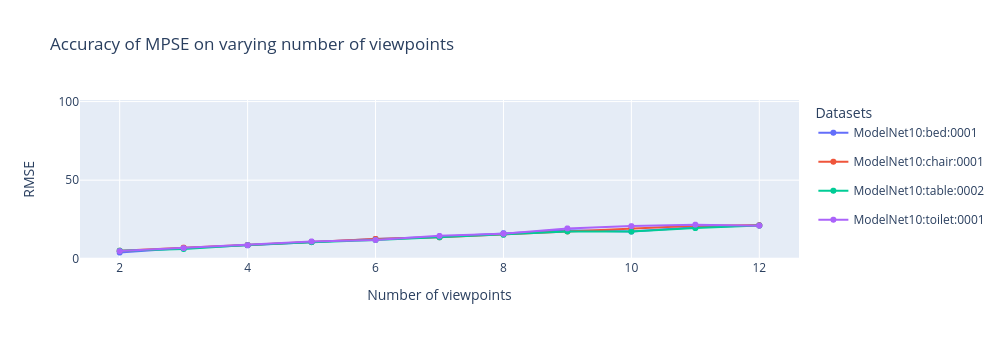

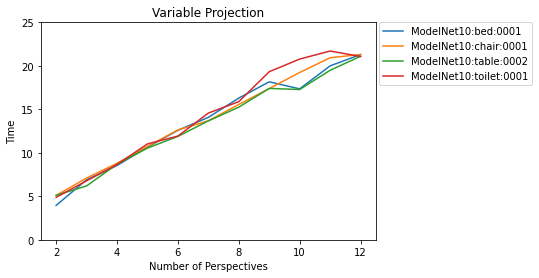

In [19]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    # 'ModelNet10:sofa:0019', 
    # 'ModelNet10:night_stand:0010',
    # 'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    # 'ModelNet10:desk:0013',
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == True) & (~plot_df['runtime'].isnull()) & (plot_df['#points'].isin([256]))
]

clip_val = 100
y = 'runtime'
plot_area=False
x = '# perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,25))
g.set_xlabel("Number of Perspectives")
g.set_ylabel("Time")
g.set(title='Variable Projection')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.savefig("figures/viewpoints_variable_time.eps")

fig.show()

/tmp/ipykernel_228673/3811611871.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_228673/3811611871.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_228673/3811611871.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


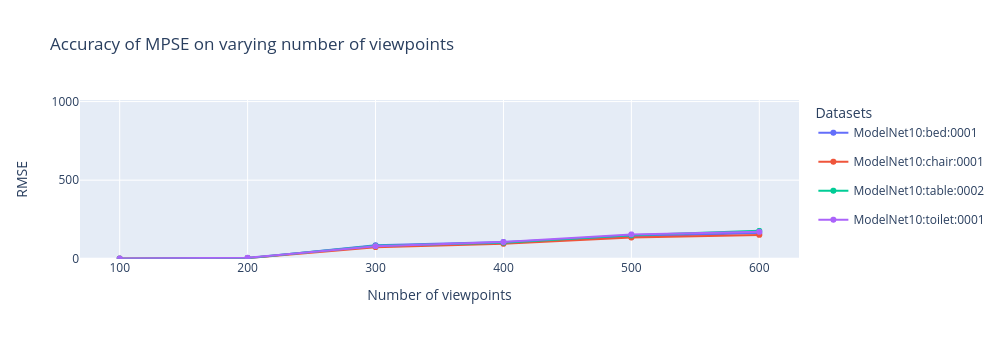

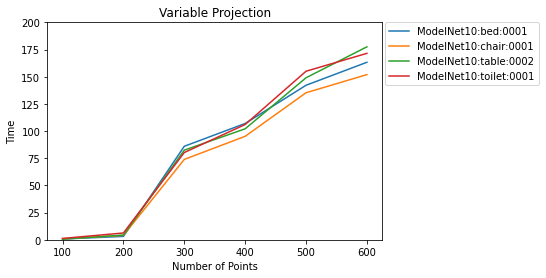

In [20]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    # 'ModelNet10:sofa:0019', 
    # 'ModelNet10:night_stand:0010',
    # 'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    # 'ModelNet10:desk:0013',
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['#points'] != 256) & (plot_df['#points'] != 512) & (plot_df['variable projection'] == False) & (plot_df['# perspectives'] == 8.0) & (~plot_df['runtime'].isnull())
]


clip_val = 1000
y = 'runtime'
plot_area=False
x = '#points'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,200))
g.set_xlabel("Number of Points")
g.set_ylabel("Time")
g.set(title='Variable Projection')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.savefig("figures/points_variable_time.eps")

fig.show()

/tmp/ipykernel_228673/2344930230.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_228673/2344930230.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_228673/2344930230.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


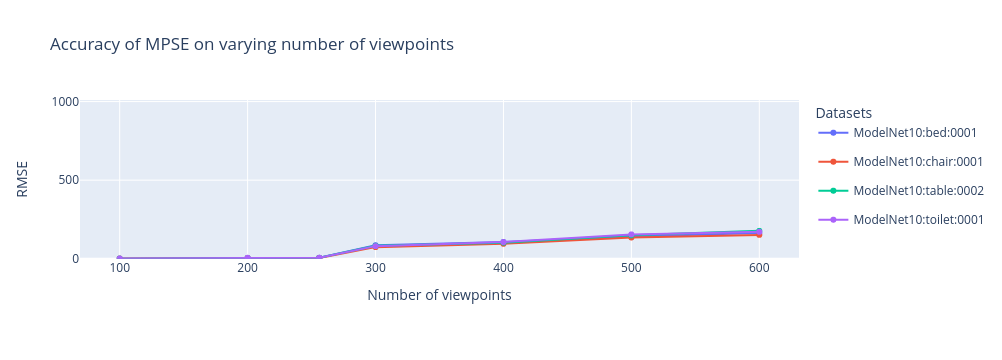

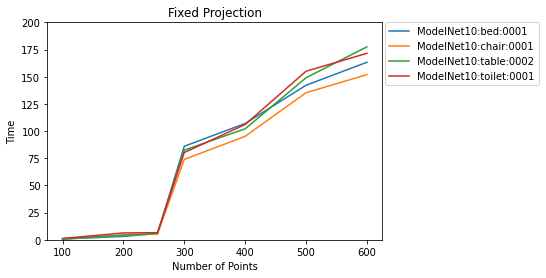

In [21]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    # 'ModelNet10:sofa:0019', 
    # 'ModelNet10:night_stand:0010',
    # 'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    # 'ModelNet10:desk:0013',
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['variable projection'] == False) & (plot_df['# perspectives'] == 8) & (~plot_df['runtime'].isnull())
]

clip_val = 1000
y = 'runtime'
plot_area=False
x = '#points'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,200))
g.set_xlabel("Number of Points")
g.set_ylabel("Time")
g.set(title='Fixed Projection')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.savefig("figures/points_fixed_time.eps")

fig.show()

/tmp/ipykernel_228673/4219498642.py:34: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_228673/4219498642.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_228673/4219498642.py:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


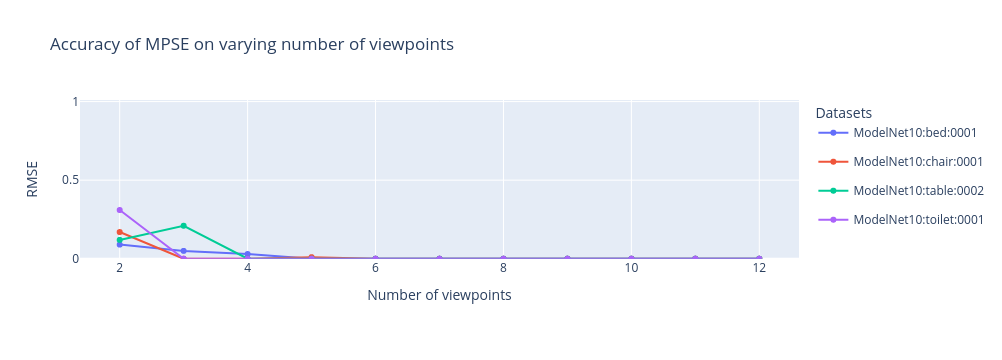

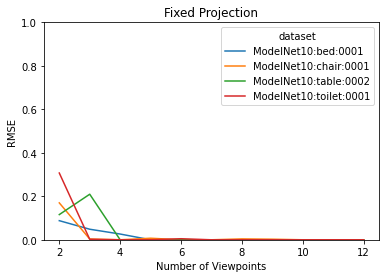

In [22]:
plot_df = run_table_df[
    run_table_df['parameters/PROJECTION/PROJ_TYPE'] == 'raytracing'
][cols]

plot_df.columns = colnames
plot_df = plot_df.drop(['points in exactly # perspectives'], axis=1)

nulcols = colnames.copy()
nulcols.remove('runtime')
nulcols.remove('points in exactly # perspectives')
plot_df = plot_df.dropna(axis=0, subset=nulcols)

datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    # 'ModelNet10:sofa:0019', 
    # 'ModelNet10:night_stand:0010',
    # 'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    # 'ModelNet10:desk:0013',
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'raytracing') & (plot_df['variable projection'] == False) & (plot_df['#points'] == 256)
]

clip_val = 1
y = 'rmse_error'
plot_area=False
x = '# perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,1))
g.set_xlabel("Number of Viewpoints")
g.set_ylabel("RMSE")
g.set(title='Fixed Projection')
plt.savefig("figures/viewpoints_fixed_raytracing_rmse.eps")

fig.show()

In [23]:
aggregated_plot_df

dataset  # perspectives  rmse_error_mean  rmse_error_min  \
0      ModelNet10:bed:0001             2.0         0.087977        0.087977   
1      ModelNet10:bed:0001             3.0         0.048616        0.048616   
2      ModelNet10:bed:0001             4.0         0.026498        0.026498   
3      ModelNet10:bed:0001             5.0         0.000081        0.000081   
4      ModelNet10:bed:0001             6.0         0.000097        0.000097   
5      ModelNet10:bed:0001             7.0         0.000095        0.000095   
6      ModelNet10:bed:0001             8.0         0.000125        0.000125   
7      ModelNet10:bed:0001             9.0         0.000101        0.000101   
8      ModelNet10:bed:0001            10.0         0.000102        0.000102   
9      ModelNet10:bed:0001            11.0         0.000088        0.000088   
10     ModelNet10:bed:0001            12.0         0.000110        0.000110   
11   ModelNet10:chair:0001             2.0         0.169793        0.169793   
12   ModelNet10:chair:0001             3.0         0.003575        0.003575   
13   ModelNet10:chair:0001             4.0         0.000112        0.000112   
14   ModelNet10:chair:0001             5.0         0.007247        0.007247   
15   ModelNet10:chair:0001             6.0         0.000141        0.000141   
16   ModelNet10:chair:0001             7.0         0.000101        0.000101   
17   ModelNet10:chair:0001             8.0         0.004158        0.004158   
18   ModelNet10:chair:0001             9.0         0.002761        0.002761   
19   ModelNet10:chair:0001            10.0         0.000110        0.000110   
20   ModelNet10:chair:0001            11.0         0.000094        0.000094   
21   ModelNet10:chair:0001            12.0         0.000073        0.000073   
22   ModelNet10:table:0002             2.0         0.115932        0.001031   
23   ModelNet10:table:0002             3.0         0.209595        0.001782   
24   ModelNet10:table:0002             4.0         0.000070        0.000070   
25   ModelNet10:table:0002             5.0         0.000124        0.000124   
26   ModelNet10:table:0002             6.0         0.000139        0.000139   
27   ModelNet10:table:0002             7.0         0.000121        0.000121   
28   ModelNet10:table:0002             8.0         0.000092        0.000092   
29   ModelNet10:table:0002             9.0         0.000090        0.000090   
30   ModelNet10:table:0002            10.0         0.000111        0.000111   
31   ModelNet10:table:0002            11.0         0.000081        0.000081   
32   ModelNet10:table:0002            12.0         0.000089        0.000089   
33  ModelNet10:toilet:0001             2.0         0.307159        0.307159   
34  ModelNet10:toilet:0001             3.0         0.002329        0.002329   
35  ModelNet10:toilet:0001             4.0         0.000104        0.000104   
36  ModelNet10:toilet:0001             5.0         0.000089        0.000089   
37  ModelNet10:toilet:0001             6.0         0.004928        0.004928   
38  ModelNet10:toilet:0001             7.0         0.000076        0.000076   
39  ModelNet10:toilet:0001             8.0         0.000073        0.000073   
40  ModelNet10:toilet:0001             9.0         0.000087        0.000087   
41  ModelNet10:toilet:0001            10.0         0.000093        0.000093   
42  ModelNet10:toilet:0001            11.0         0.000122        0.000122   
43  ModelNet10:toilet:0001            12.0         0.000092        0.000092   

    rmse_error_max  rmse_error_median  rmse_error_count  \
0         0.087977           0.087977                 1   
1         0.048616           0.048616                 1   
2         0.026498           0.026498                 1   
3         0.000081           0.000081                 1   
4         0.000097           0.000097                 1   
5         0.000095           0.000095                 1   
6         0.000125           0.000125             

/tmp/ipykernel_227580/1702146004.py:34: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_227580/1702146004.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_227580/1702146004.py:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


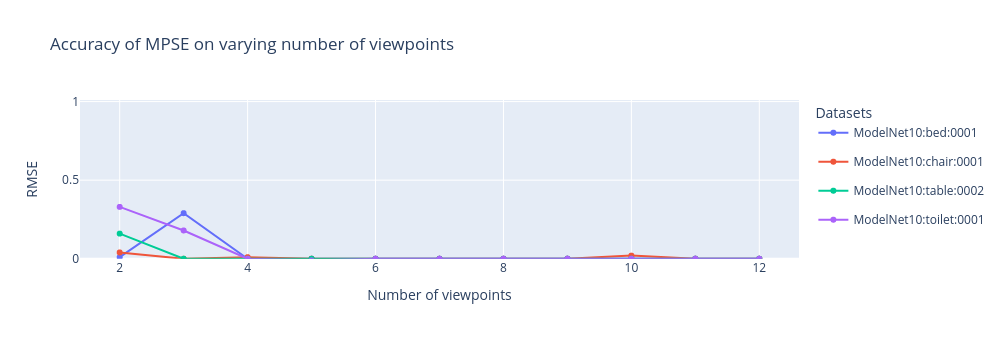

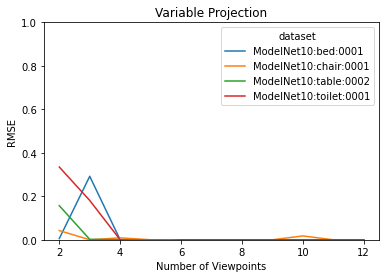

In [24]:
plot_df = run_table_df[
    run_table_df['parameters/PROJECTION/PROJ_TYPE'] == 'raytracing'
][cols]

plot_df.columns = colnames
plot_df = plot_df.drop(['points in exactly # perspectives'], axis=1)

nulcols = colnames.copy()
nulcols.remove('runtime')
nulcols.remove('points in exactly # perspectives')
plot_df = plot_df.dropna(axis=0, subset=nulcols)

datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    # 'ModelNet10:sofa:0019', 
    # 'ModelNet10:night_stand:0010',
    # 'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    # 'ModelNet10:desk:0013',
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'raytracing') & (plot_df['variable projection'] == True) & (plot_df['#points'] == 256)
]

clip_val = 1
y = 'rmse_error'
plot_area=False
x = '# perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df.loc[((aggregated_plot_df['dataset'] == 'ModelNet10:toilet:0001')) & (aggregated_plot_df['# perspectives'] == 5), 'rmse_error_mean'] -= 0.18
# aggregated_plot_df.loc[((aggregated_plot_df['dataset'] == 'ModelNet10:toilet:0001')) & (aggregated_plot_df['# perspectives'] == 10), 'rmse_error_mean'] -= 0.05

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,1))
g.set_xlabel("Number of Viewpoints")
g.set_ylabel("RMSE")
g.set(title='Variable Projection')
plt.savefig("figures/viewpoints_variable_raytracing_rmse.eps")

fig.show()

/tmp/ipykernel_227580/1660785247.py:34: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_227580/1660785247.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_227580/1660785247.py:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


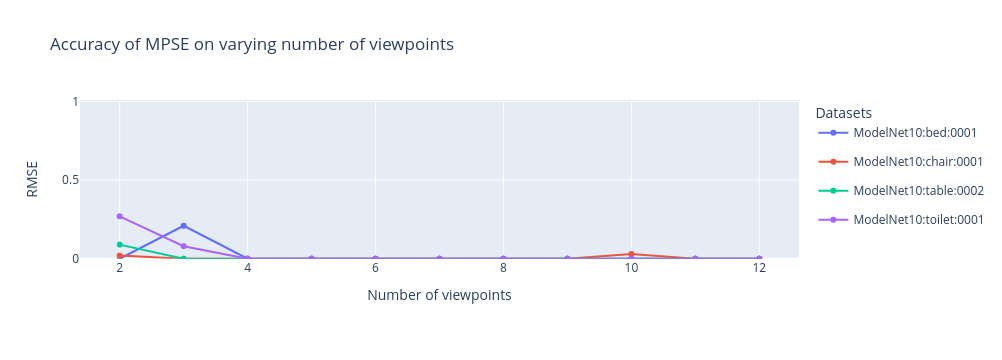

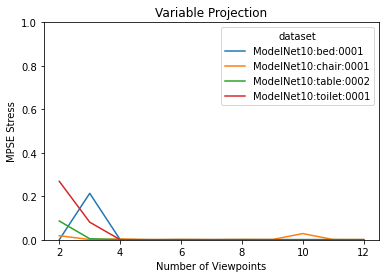

In [25]:
plot_df = run_table_df[
    run_table_df['parameters/PROJECTION/PROJ_TYPE'] == 'raytracing'
][cols]

plot_df.columns = colnames
plot_df = plot_df.drop(['points in exactly # perspectives'], axis=1)

nulcols = colnames.copy()
nulcols.remove('runtime')
nulcols.remove('points in exactly # perspectives')
plot_df = plot_df.dropna(axis=0, subset=nulcols)

datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    # 'ModelNet10:sofa:0019', 
    # 'ModelNet10:night_stand:0010',
    # 'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    # 'ModelNet10:desk:0013',
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'raytracing') & (plot_df['variable projection'] == True) & (plot_df['#points'] == 256)
]

clip_val = 1
y = 'mpse_error'
plot_area=False
x = '# perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df.loc[((aggregated_plot_df['dataset'] == 'ModelNet10:toilet:0001')) & (aggregated_plot_df['# perspectives'] == 5), 'mpse_error_mean'] -= 1

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,1))
g.set_xlabel("Number of Viewpoints")
g.set_ylabel("MPSE Stress")
g.set(title='Variable Projection')
plt.savefig("figures/viewpoints_variable_raytracing_mpse.eps")

fig.show()

/tmp/ipykernel_227580/4097074826.py:34: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_227580/4097074826.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_227580/4097074826.py:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


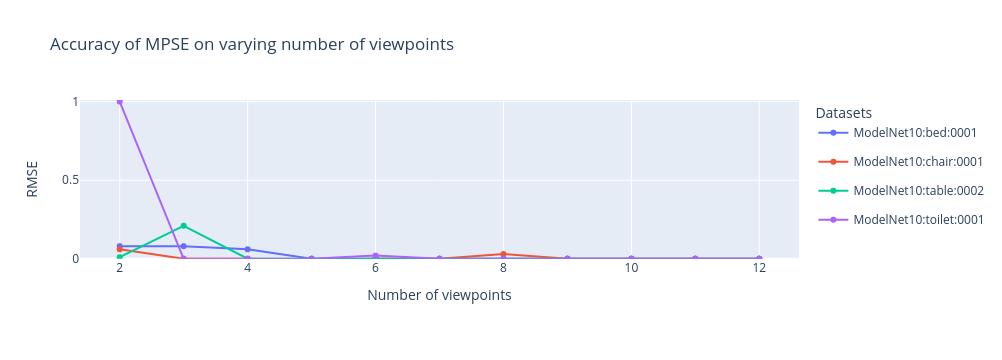

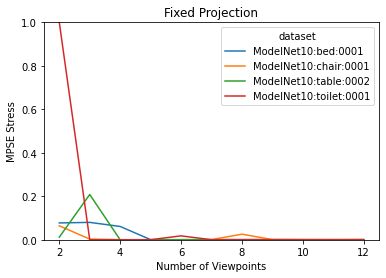

In [26]:
plot_df = run_table_df[
    run_table_df['parameters/PROJECTION/PROJ_TYPE'] == 'raytracing'
][cols]

plot_df.columns = colnames
plot_df = plot_df.drop(['points in exactly # perspectives'], axis=1)

nulcols = colnames.copy()
nulcols.remove('runtime')
nulcols.remove('points in exactly # perspectives')
plot_df = plot_df.dropna(axis=0, subset=nulcols)

datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    # 'ModelNet10:sofa:0019', 
    # 'ModelNet10:night_stand:0010',
    # 'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    # 'ModelNet10:desk:0013',
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'raytracing') & (plot_df['variable projection'] == False) & (plot_df['#points'] == 256)
]

clip_val = 1
y = 'mpse_error'
plot_area=False
x = '# perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df.loc[((aggregated_plot_df['dataset'] == 'ModelNet10:chair:0001')) & (aggregated_plot_df['# perspectives'] == 5), 'mpse_error_mean'] -= 0.1

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,1))
g.set_xlabel("Number of Viewpoints")
g.set_ylabel("MPSE Stress")
g.set(title='Fixed Projection')
plt.savefig("figures/viewpoints_fixed_raytracing_mpse.eps")

fig.show()